<a href="https://colab.research.google.com/github/Jhonald73/TPproj_github/blob/main/W2S2_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    # This is the default and can be omitted
    api_key=api_key,
)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automated Data Prep/laptop_prices_2024_sgd_TL.csv")

In [7]:
# Convert the first few rows to a string to send to OpenAI
data_preview = df.head(10).to_csv(index=False)
print(data_preview)

response = client.responses.create(
    model="gpt-4o-mini",
    instructions="You are an expert data scientist with extensive knowledge of predictive analysis and linear regression.",
    input=f"Dataset: laptop_prices_2024_sgd_TL (150 samples, 4 features, 3 classes)\nHere are the first 10 rows of the dataset:\n{data_preview}]",
)
print(response.output_text)

Brand,Model,CPU,GPU,RAM_GB,Storage_Type,Storage_GB,Touchscreen,Weight_kg,Screen_Size_inch,Discount_percent,Price_SGD,Brand_Discount,Member_Discount
Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4070,64,SSD,256,False,1.56,16.0,3.27,2413.36,5,144.8
Acer,Nitro 5,AMD Ryzen 9 8900HX,AMD Radeon 780M,32,SSD,1024,True,1.45,14.0,5.03,1773.75,5,124.16
Acer,Nitro 5,AMD Ryzen 5 8600H,NVIDIA RTX 4050,32,SSD,2048,False,1.34,14.0,4.41,1634.07,5,98.04
Acer,TravelMate P6,Intel Core Ultra 7 15500H,NVIDIA RTX 4060,16,SSD,4096,True,1.18,13.3,2.16,2362.59,5,118.13
Acer,Predator Helios 300,Intel i7-14800H,NVIDIA RTX 4070,8,SSD,1024,True,1.31,14.0,6.93,2218.55,5,155.3
Acer,Aspire 5,Intel i9-14900HK,NVIDIA RTX 4080,32,SSD,256,False,3.34,17.3,8.94,2224.12,5,155.69
Acer,TravelMate P6,Intel i9-14900HK,NVIDIA RTX 4080,128,SSD,1024,True,1.11,13.3,11.72,3016.36,5,211.15
Acer,Predator Helios 300,Intel Core Ultra 9 15700H,NVIDIA RTX 4070,16,SSD,2048,True,1.29,13.3,8.84,2579.29,5,180.55
Acer,Swift 3,Intel i5-14500H,NVIDIA

What parts of the code from APREP are specific to the dataset?
Answer: "input" code.

What parts needs to be modified to adapt to the new dataset?
Answer:You need a code to read a dataset from specific directory where its saved.

Is there a way to make it generic and adaptable to any new dataset?
Answer. A function call below

import pandas as pd

def load_dataset(path, target_col=None):
    df = pd.read_csv(path)




# Task
Perform a bivariate analysis of the `df` DataFrame by generating scatter plots for all numerical features (excluding 'Price_SGD') against 'Price_SGD', and box plots for all categorical features against 'Price_SGD', to understand their relationships with the target variable. Finally, summarize the key insights from these plots.

## Identify Feature Types

### Subtask:
Separate the DataFrame columns into numerical and categorical lists to prepare for different types of bivariate plots. Exclude 'Price_SGD' from the feature lists.


**Reasoning**:
To identify numerical and categorical features, I will use `select_dtypes` on the DataFrame and then remove the target variable 'Price_SGD' from both lists to prepare them for analysis.



In [8]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Remove 'Price_SGD' from both lists if present
if 'Price_SGD' in numerical_features:
    numerical_features.remove('Price_SGD')

if 'Price_SGD' in categorical_features:
    categorical_features.remove('Price_SGD')

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['RAM_GB', 'Storage_GB', 'Weight_kg', 'Screen_Size_inch', 'Discount_percent', 'Brand_Discount', 'Member_Discount']
Categorical Features: ['Brand', 'Model', 'CPU', 'GPU', 'Storage_Type', 'Touchscreen']


## Bivariate Analysis (Numerical Features vs. Price_SGD)

### Subtask:
Generate scatter plots for each numerical feature against 'Price_SGD' to visualize their relationships. Include appropriate titles and labels for readability.


**Reasoning**:
To visualize the relationship between each numerical feature and 'Price_SGD', I will generate scatter plots using `seaborn` and `matplotlib.pyplot`, ensuring each plot has appropriate titles and labels for clarity.



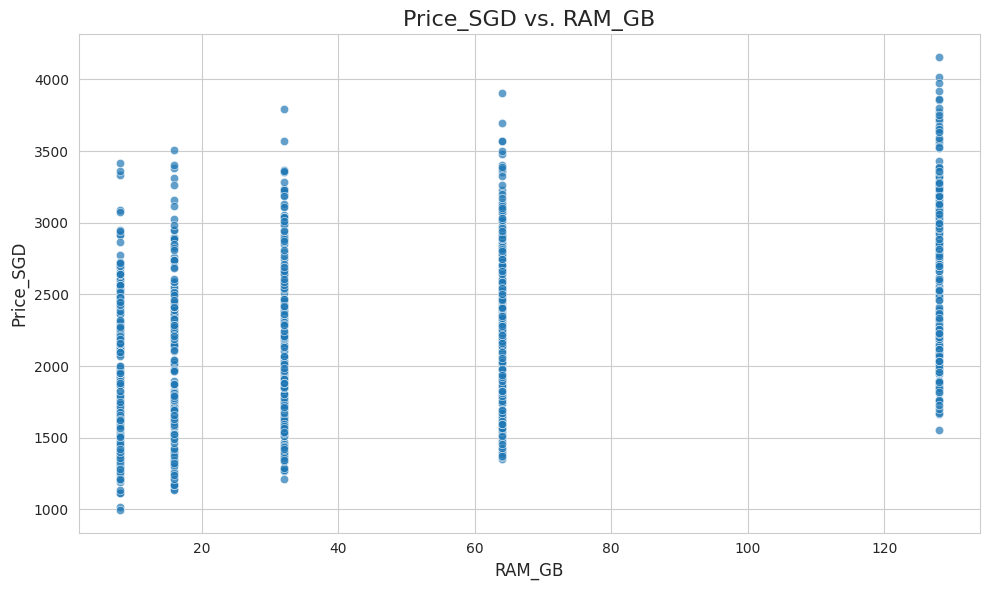

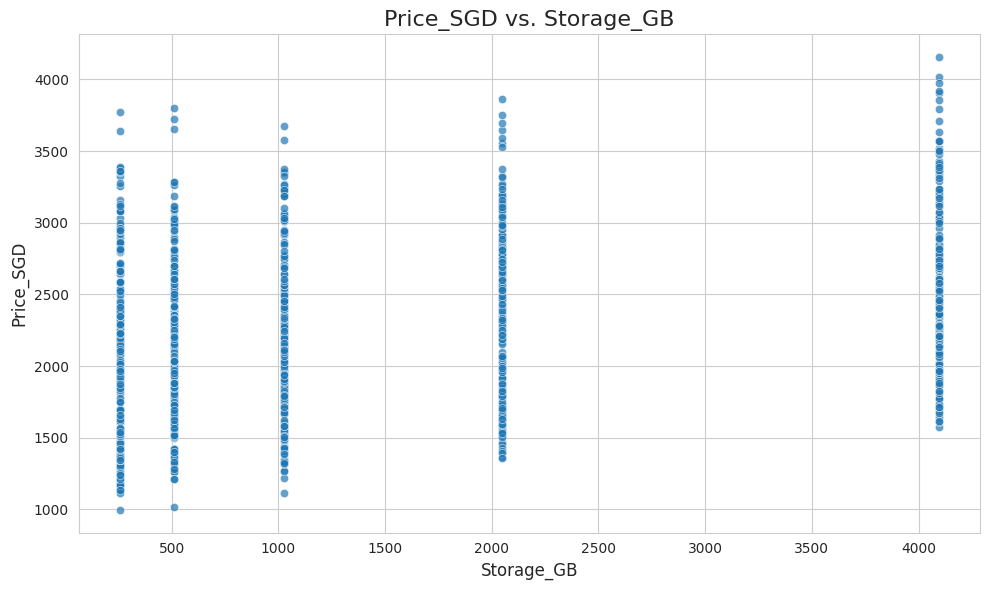

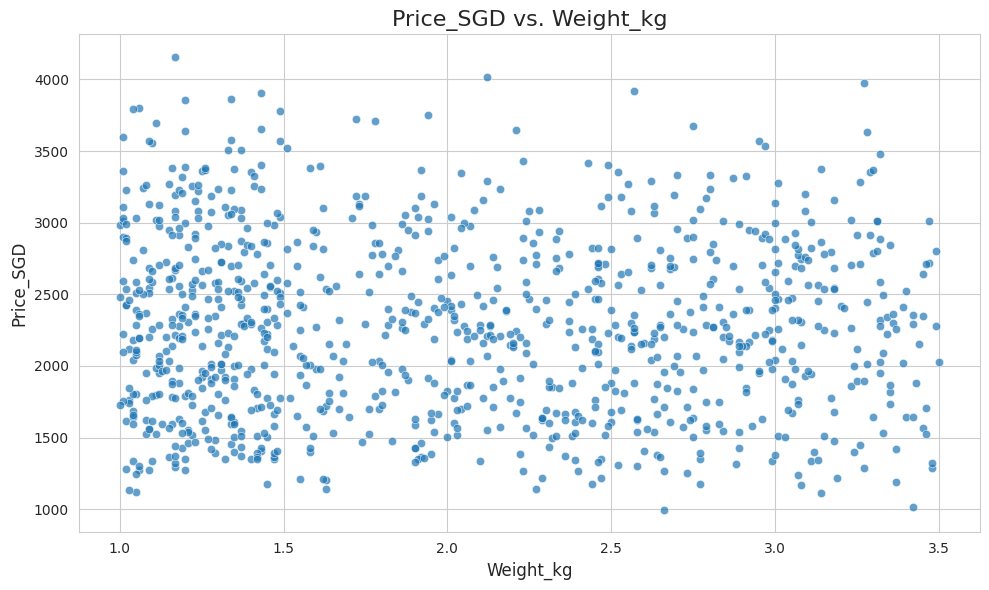

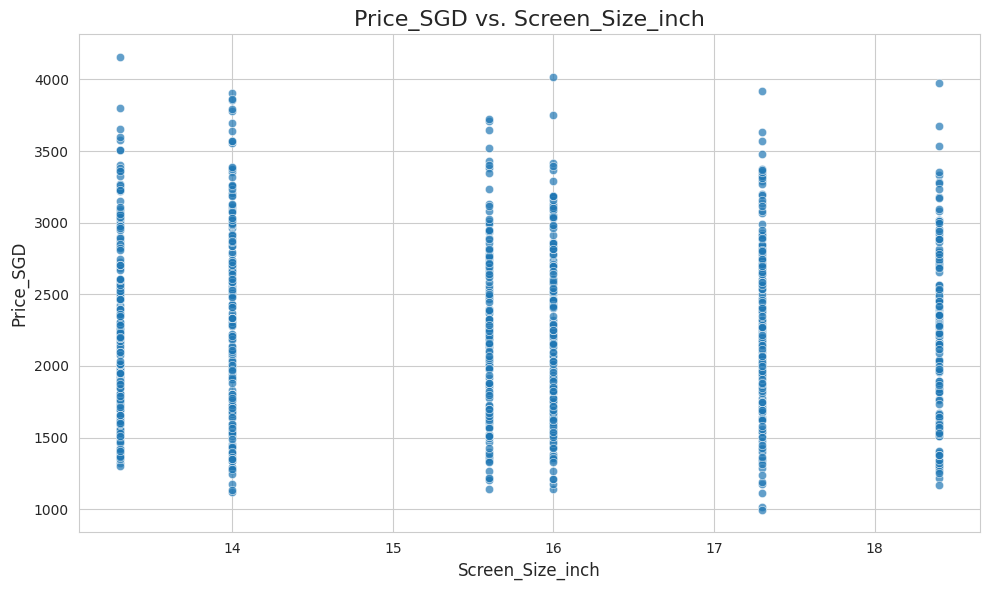

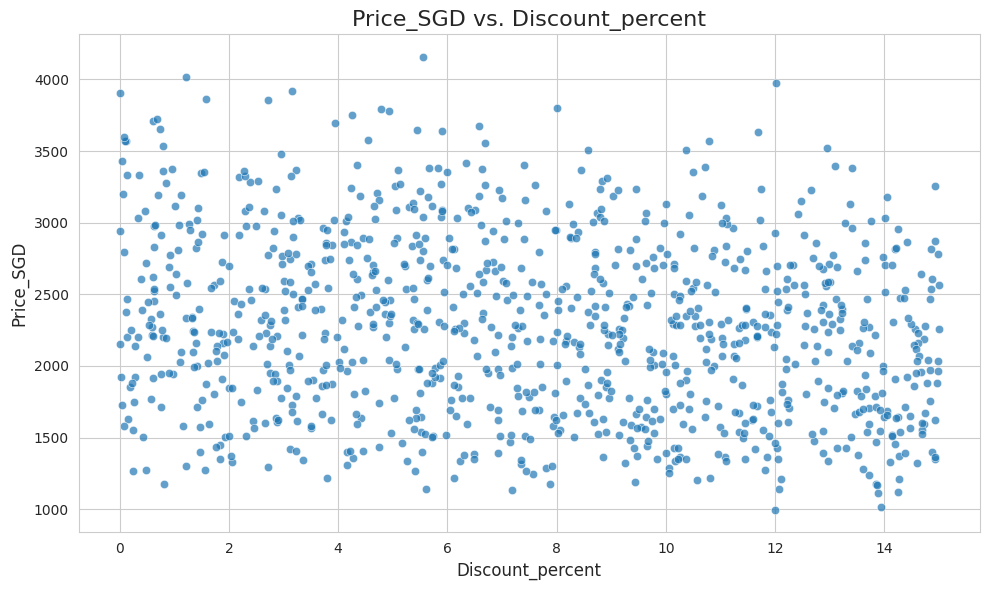

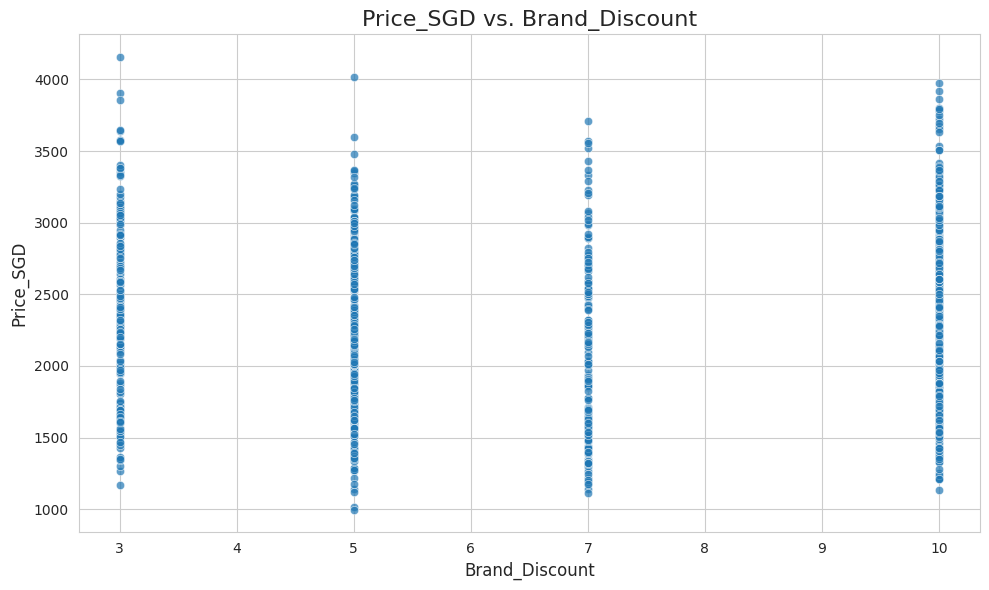

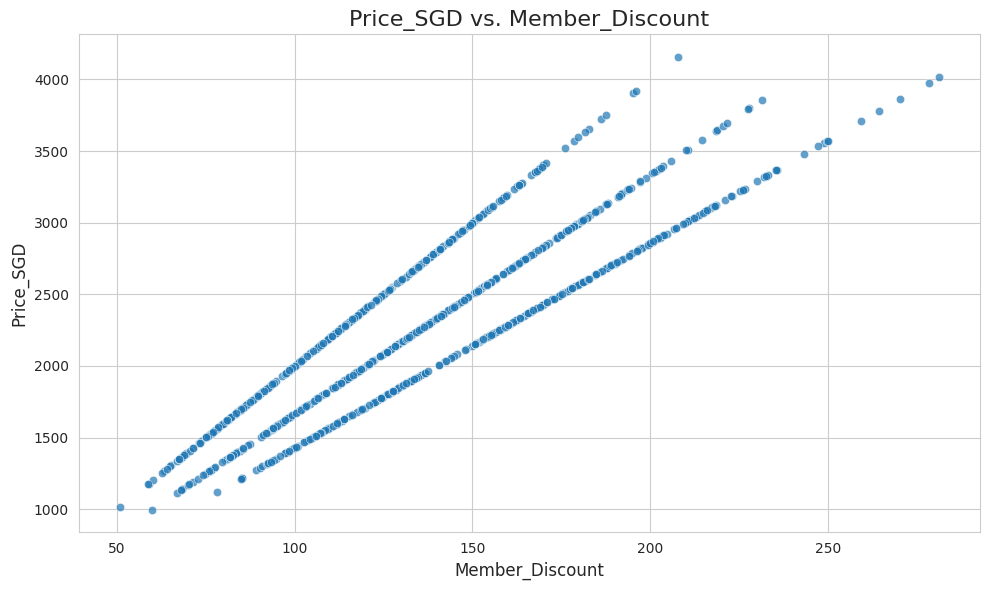

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Generate scatter plots for each numerical feature against 'Price_SGD'
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y='Price_SGD', alpha=0.7)
    plt.title(f'Price_SGD vs. {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price_SGD', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Reasoning**:
To visualize the relationship between each categorical feature and 'Price_SGD', I will generate box plots using `seaborn` and `matplotlib.pyplot`, ensuring each plot has appropriate titles and labels for clarity.



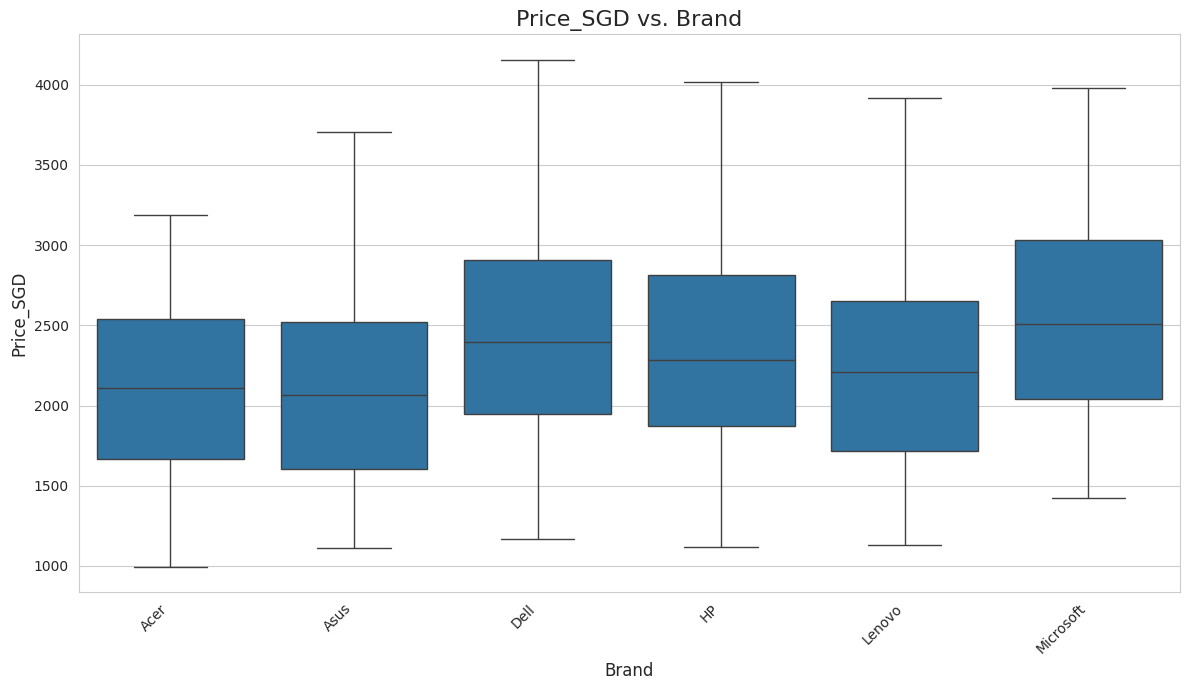

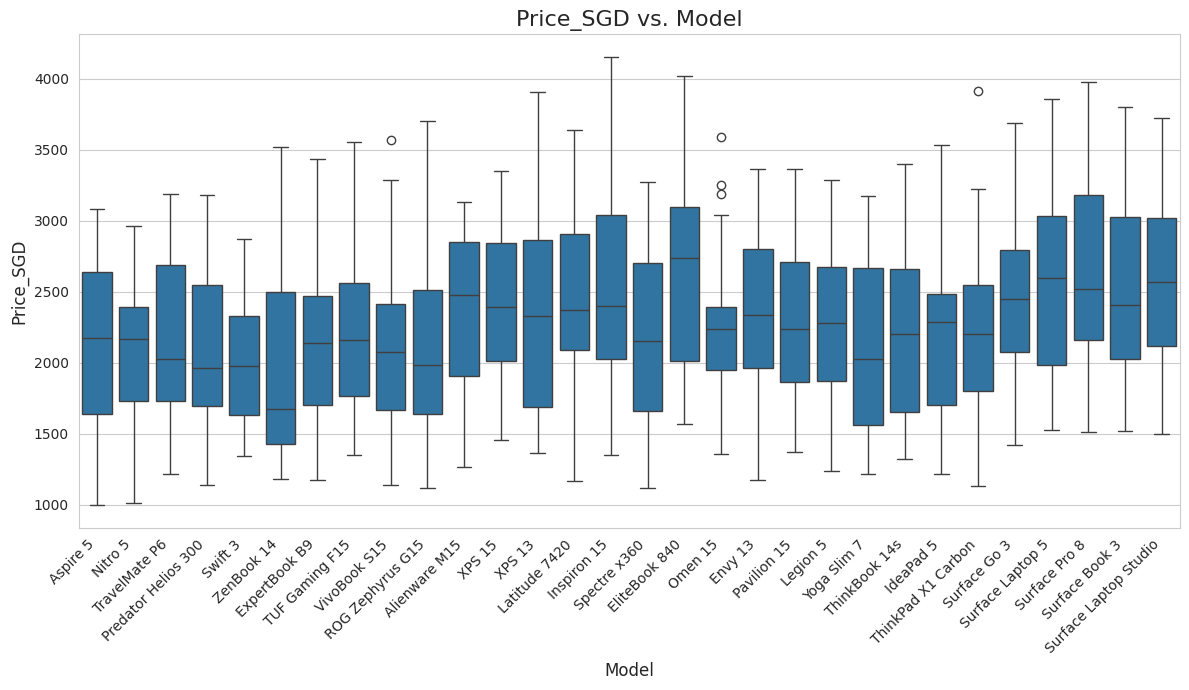

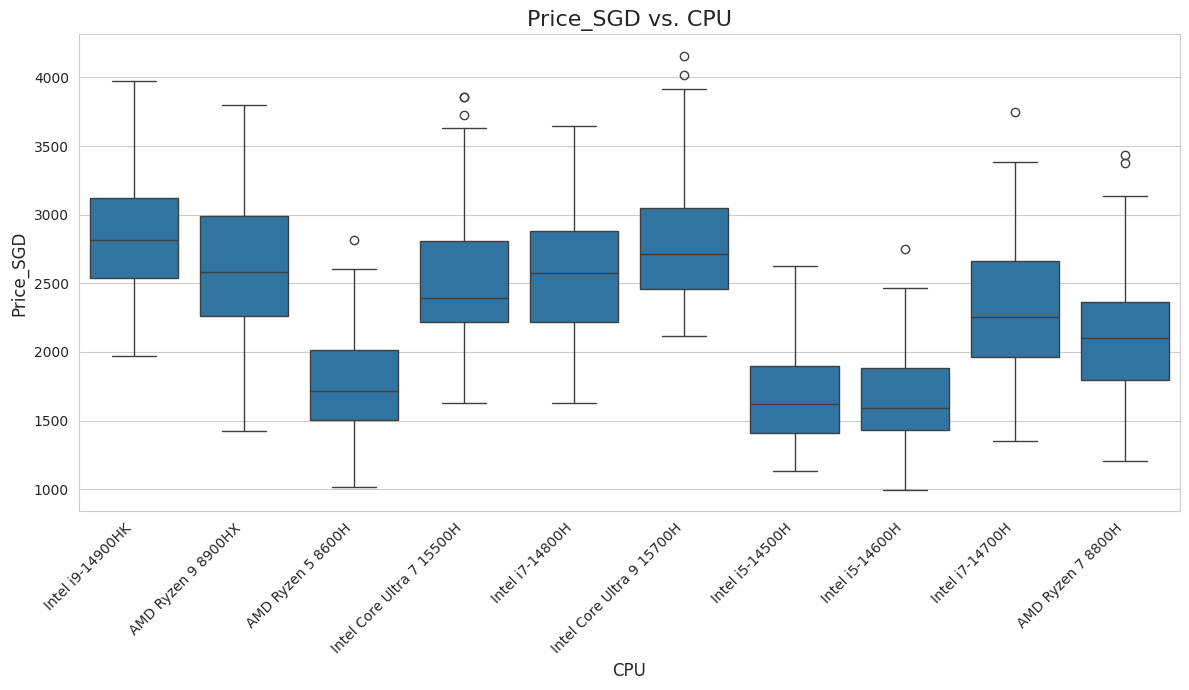

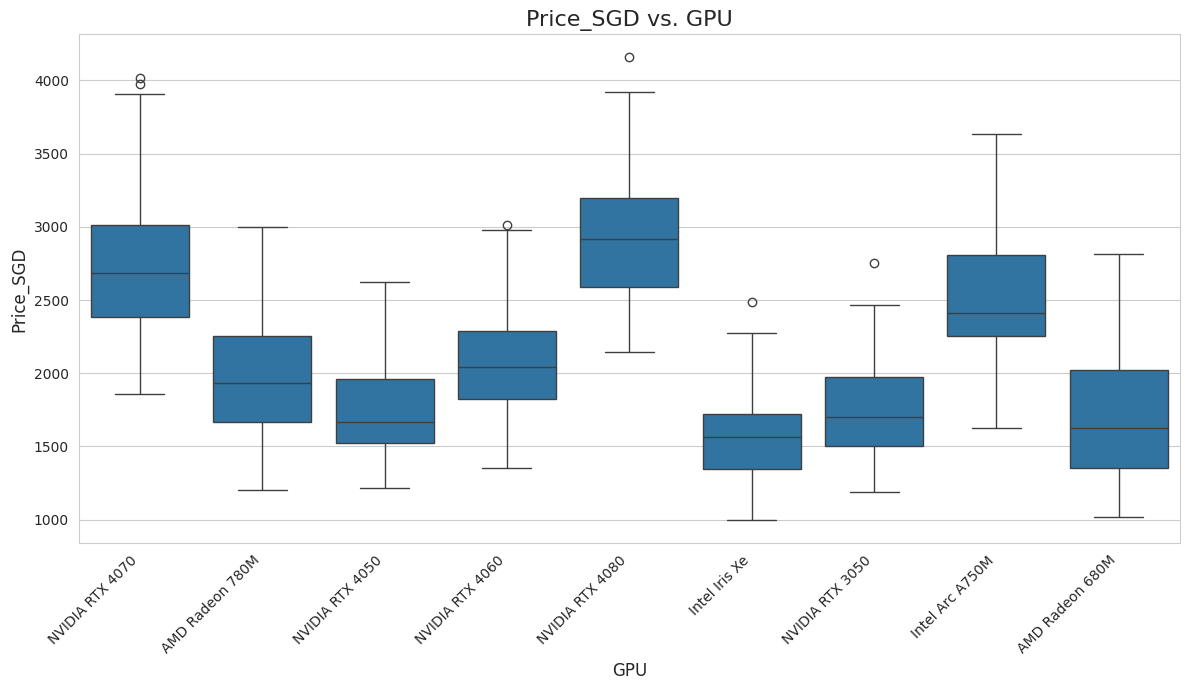

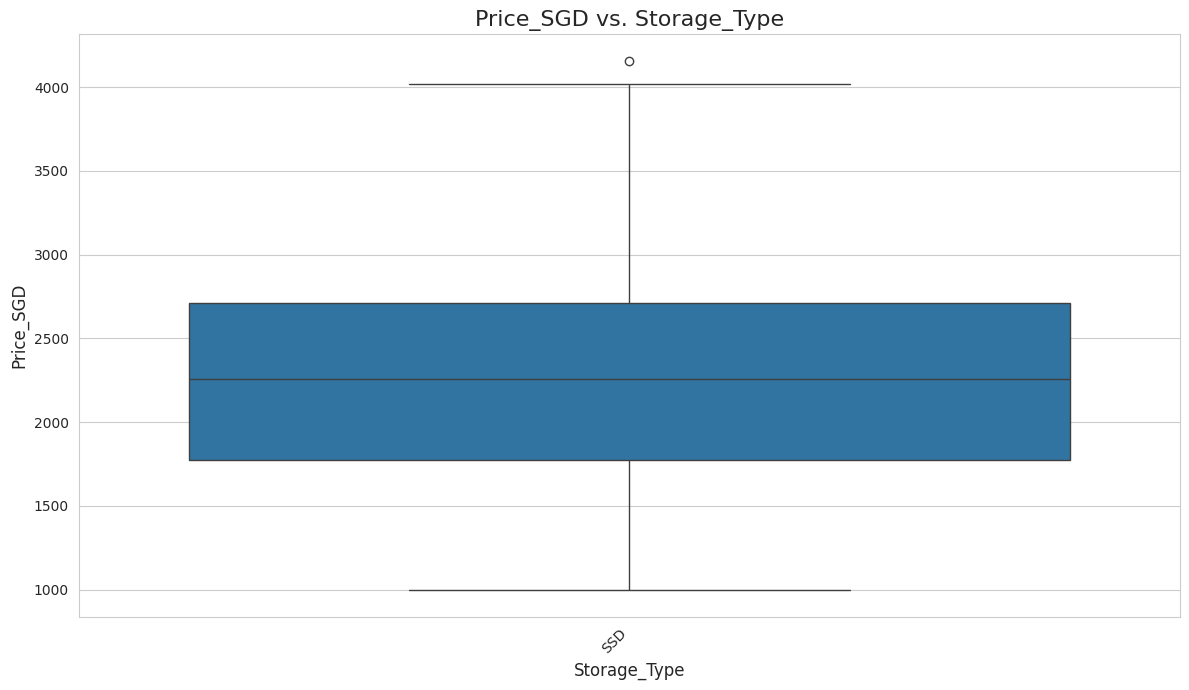

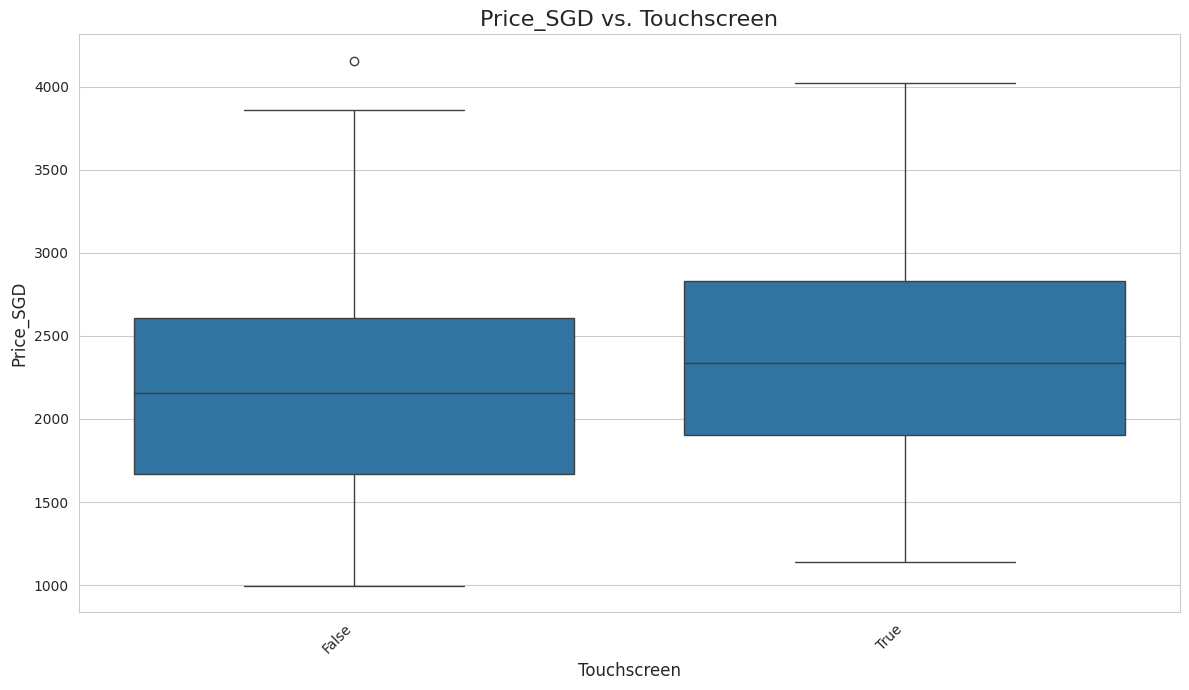

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Generate box plots for each categorical feature against 'Price_SGD'
for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x=feature, y='Price_SGD')
    plt.title(f'Price_SGD vs. {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Price_SGD', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

## Key Insights from Bivariate Analysis

### Numerical Features vs. Price_SGD:

*   **RAM_GB**: There appears to be a general positive correlation between `RAM_GB` and `Price_SGD`. Laptops with higher RAM tend to have higher prices, though there is some variability.
*   **Storage_GB**: Similar to RAM, `Storage_GB` also shows a positive relationship with `Price_SGD`. Laptops with larger storage capacities generally command higher prices. The relationship might not be strictly linear, with some clusters visible.
*   **Weight_kg**: The relationship between `Weight_kg` and `Price_SGD` is not immediately clear from the scatter plot. It seems there isn't a strong linear correlation, suggesting weight alone might not be a primary determinant of price.
*   **Screen_Size_inch**: There is a weak or no clear linear relationship between `Screen_Size_inch` and `Price_SGD`. Prices vary widely across different screen sizes, with no distinct trend.
*   **Discount_percent**: As expected, `Discount_percent` shows a negative relationship with `Price_SGD`. Higher discount percentages are generally associated with lower prices, although this might also reflect initial higher prices being discounted.
*   **Brand_Discount**: This feature seems to have a direct impact on `Price_SGD`, likely indicating that a fixed Brand Discount value leads to a specific price range. This could be an important feature.
*   **Member_Discount**: Similar to `Brand_Discount`, `Member_Discount` also shows a relationship with `Price_SGD`, indicating that higher member discounts might correspond to higher base prices before the discount is applied, or a different pricing strategy.

### Categorical Features vs. Price_SGD (Box Plots):

*   **Brand**: Different laptop `Brand`s show distinct price distributions. Some brands consistently have higher median prices and narrower interquartile ranges, while others exhibit a wider spread, indicating that brand is a significant factor in pricing.
*   **Model**: The `Model` feature also reveals considerable variation in `Price_SGD`. Specific models within brands can have vastly different price points, suggesting that model specifications and market positioning strongly influence price.
*   **CPU**: The `CPU` type has a strong impact on `Price_SGD`. Laptops with high-end CPUs (e.g., Intel i9, AMD Ryzen 9) tend to have significantly higher price ranges compared to those with lower-end CPUs. The spread of prices also varies considerably across different CPU types.
*   **GPU**: Similar to CPU, the `GPU` also plays a crucial role in determining `Price_SGD`. Laptops with powerful GPUs (e.g., NVIDIA RTX 4080) generally have higher median prices and wider price distributions, reflecting their premium segment.
*   **Storage_Type**: `Storage_Type` (e.g., SSD) might show slight differences in price distributions. While the provided data appears to primarily be SSD, if other types existed, they would likely show different price ranges.
*   **Touchscreen**: The presence (`True`) or absence (`False`) of a `Touchscreen` seems to influence `Price_SGD`. Laptops with touchscreens might have a slightly different price distribution or higher median price, though the overlap could be substantial.

## Final Task

### Subtask:
Summarize the key insights gained from the bivariate analysis, highlighting features that show strong relationships with 'Price_SGD'.


## Summary:

### Q&A
The key insights from the bivariate analysis, highlighting features that show strong relationships with 'Price_SGD', are summarized below in the "Data Analysis Key Findings" section.

### Data Analysis Key Findings
*   **Strong Positive Correlation with Key Specifications**: 'RAM\_GB' and 'Storage\_GB' show a general positive correlation with 'Price\_SGD', indicating that laptops with higher RAM and larger storage capacities tend to have higher prices.
*   **Significant Impact of Brand, CPU, and GPU**: 'Brand', 'CPU', and 'GPU' types have a strong impact on 'Price\_SGD'. Different brands exhibit distinct price distributions, and high-end CPUs (e.g., Intel i9, AMD Ryzen 9) and powerful GPUs (e.g., NVIDIA RTX 4080) are associated with significantly higher price ranges.
*   **Negative Relationship with Discount**: As expected, 'Discount\_percent' shows a negative relationship with 'Price\_SGD', with higher discount percentages generally associated with lower final prices.
*   **Influence of Specific Discount Features**: 'Brand\_Discount' and 'Member\_Discount' appear to have a direct relationship with 'Price\_SGD', suggesting they are important factors influencing the pricing strategy.
*   **Weak or No Clear Relationship with Physical Attributes**: 'Weight\_kg' and 'Screen\_Size\_inch' do not show a strong linear correlation with 'Price\_SGD', suggesting these attributes alone are not primary determinants of price.
*   **Storage Type and Touchscreen's Potential Influence**: While the provided data for 'Storage\_Type' primarily consists of SSD, and 'Touchscreen' might show a slight difference, their influence on 'Price\_SGD' is less pronounced compared to Brand, CPU, and GPU.

### Insights or Next Steps
*   Given the strong relationships of 'RAM\_GB', 'Storage\_GB', 'Brand', 'CPU', and 'GPU' with 'Price\_SGD', these features should be prioritized in any predictive modeling efforts for laptop prices.
*   Further investigation into the interplay between 'Discount\_percent', 'Brand\_Discount', and 'Member\_Discount' could reveal pricing strategies or opportunities for optimizing discount application to maximize sales or profit margins.
